# 2 Vetting TOI 175 new 4th transiting candidate
Whenever we find a new promising signal in `sherlock` we will have to carry a proper vetting of the data. This is the standard practice by the Science Processing Operations Center (SPOC) with their Data Validation (DV) Reports presented by Twicken et al. (2018) and Li et al. (2018) for the Kepler and TESS missions. In our case, we tried to replicate their DV checks with some oversimplifications. In the vetting execution, `sherlock` will check for 1) Odd-even transit shapes, 2) Transit SNR for the different available cadences, 3) Signal harmonic and subharmonic SNRs, 4) Transit source offset from TPFs (both with differential imaging and a `sherlock` new algorithm based on BLS phase folding of the TPF per-pixel data), 5) Centroids shift from centroids and motion data, 6) Single transits assessment.

To run the vetting for our new signal (which we found in the 4th run), we would go to the `sherlock` search results directory `/TOI-175-results/TIC307210830_all` and execute:

`python3.8 -m sherlockpipe.vet --candidate 4`

The output of the vetting generated by `sherlock` consists on two PDF reports (a complete and a summary one) and a few csvs stored for reproducibility. In order to explore the resulting PDF page by page in this notebook we will need the `pdf2image` module.

In [1]:
! python3.8 -m pip install pdf2image

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python3.8 -m pip install --upgrade pip


Now that it is installed, let's begin with the report. We will load the summary PDF and convert it into a set of images (one image per page).

In [5]:
from pdf2image import convert_from_path
from IPython.display import Image
import os 

your_execution_dir = os.getcwd() 
# Store Pdf with convert_from_path function
images = convert_from_path(your_execution_dir + '/TOI-175-results/TIC307210830_all/vetting_2/TIC 307210830_transits_validation_report_summary.pdf')


Time to look into the first page. It shows a header with Table 1 and Table 2, which are self-descriptive. Then we can find the Table 3. This table contains several coloured metrics: green ones are metrics that passed the defined `sherlock` thresholds, red ones are problematic metrics that should be eye-inspected and yellow ones are inconclusive metrics that will probably also need eye inspection. One by one the metrics are:

* `fast_snr`: SNR of the transit model in the folded original fast-cadence curve. Passes if > 3.
* `short_snr`: SNR of the transit model in the folded original short-cadence curve. Passes if > 3.
* `long_snr`: SNR of the transit model in the folded original long-cadence curve. Passes if > 3.
* `folded_cadences_snr`: The Standard Deviation of the fast_snr, short_snr and long_snr is computed and divided by their mean. Passes if < 0.3.
* `snr_p_t0`: SNR of the transit model in the Period folded `sherlock` selected processed curve. Represents the main transit events. Passes if > 3.
* `snr_p_2t0`: SNR of the transit model in the Period folded `sherlock` selected processed curve centered on T0 + Period / 2. Represents the occultation transit events. Passes if < 3.
* `snr_2p_t0`: SNR of the transit model in the 2 * Period folded `sherlock` selected processed curve centered on T0. Represents the odd transits. Passes if > 3.
* `snr_2p_2t0`: SNR of the transit model in the 2 * Period folded `sherlock` selected processed curve centered on T0 + Period. Represents the even transits. Passes if > 3.
* `snr_p2_t0`: SNR of the transit model in the Period / 2 folded `sherlock` selected processed curve centered on T0, and the original signal being masked. Represents the occultation transit events and reports the same values than `snr_p_2t0`. Passes if < 3.
* `snr_p2_t02`: SNR of the transit model in the Period / 2 folded `sherlock` selected processed curve centered on T0 + Period / 2, and the original signal being masked. Passes if < 3.
* `snr_p_score`: Passes if `snr_p_t0` > 3 and `snr_p_2t0` < 3
* `snr_2p_score`: Passes if `snr_2p_t0` > 3 and `snr_2p_t0` > 3
* `snr_p2_score`: Passes if `snr_p2_t0` < 3 and `snr_p2_t02` < 3
* `transit_offset_ra`: The distance between the transit source offset position and the star in the Right Ascension axis, in degrees. Passes if < `mission_pixel_size` (20.25'' for TESS and 4'' for Kepler)
* `transit_offset_dec`: The distance between the transit source offset position and the star in the Declination axis, in degrees. Passes if < `mission_pixel_size`
* `transit_offset_err`: The transit source offset error in degrees. Passes if < 3 * `mission_pixel_size`
* `transit_offset_pos`: The absolute distance from the transit source and the star position in the sky, in degrees. Passes if < `offset_err`
* `core_flux_snr`: The computed aperture flux SNR with the transit model. Passes if > 3
* `halo_flux_snr`: The computed aperture flux with a ring aperture over the core aperture with the transit model. Passes if > 3.
* `og_score`: The relationship `halo_flux_snr` / `core_flux_snr`. Passes if `og_score` < 1 and `core_flux_snr` > 3
* `centroids_ra_snr`: The SNR of the transit model on the Period folded (centroids - motion) Right Ascension curve. Passes if < 3.
* `centroids_dec_snr`: The SNR of the transit model on the Period folded (centroids - motion) Declination curve. Passes if < 3.

Ok, now that we know the kind of metrics that we will find in the first page, let's take a look into it:

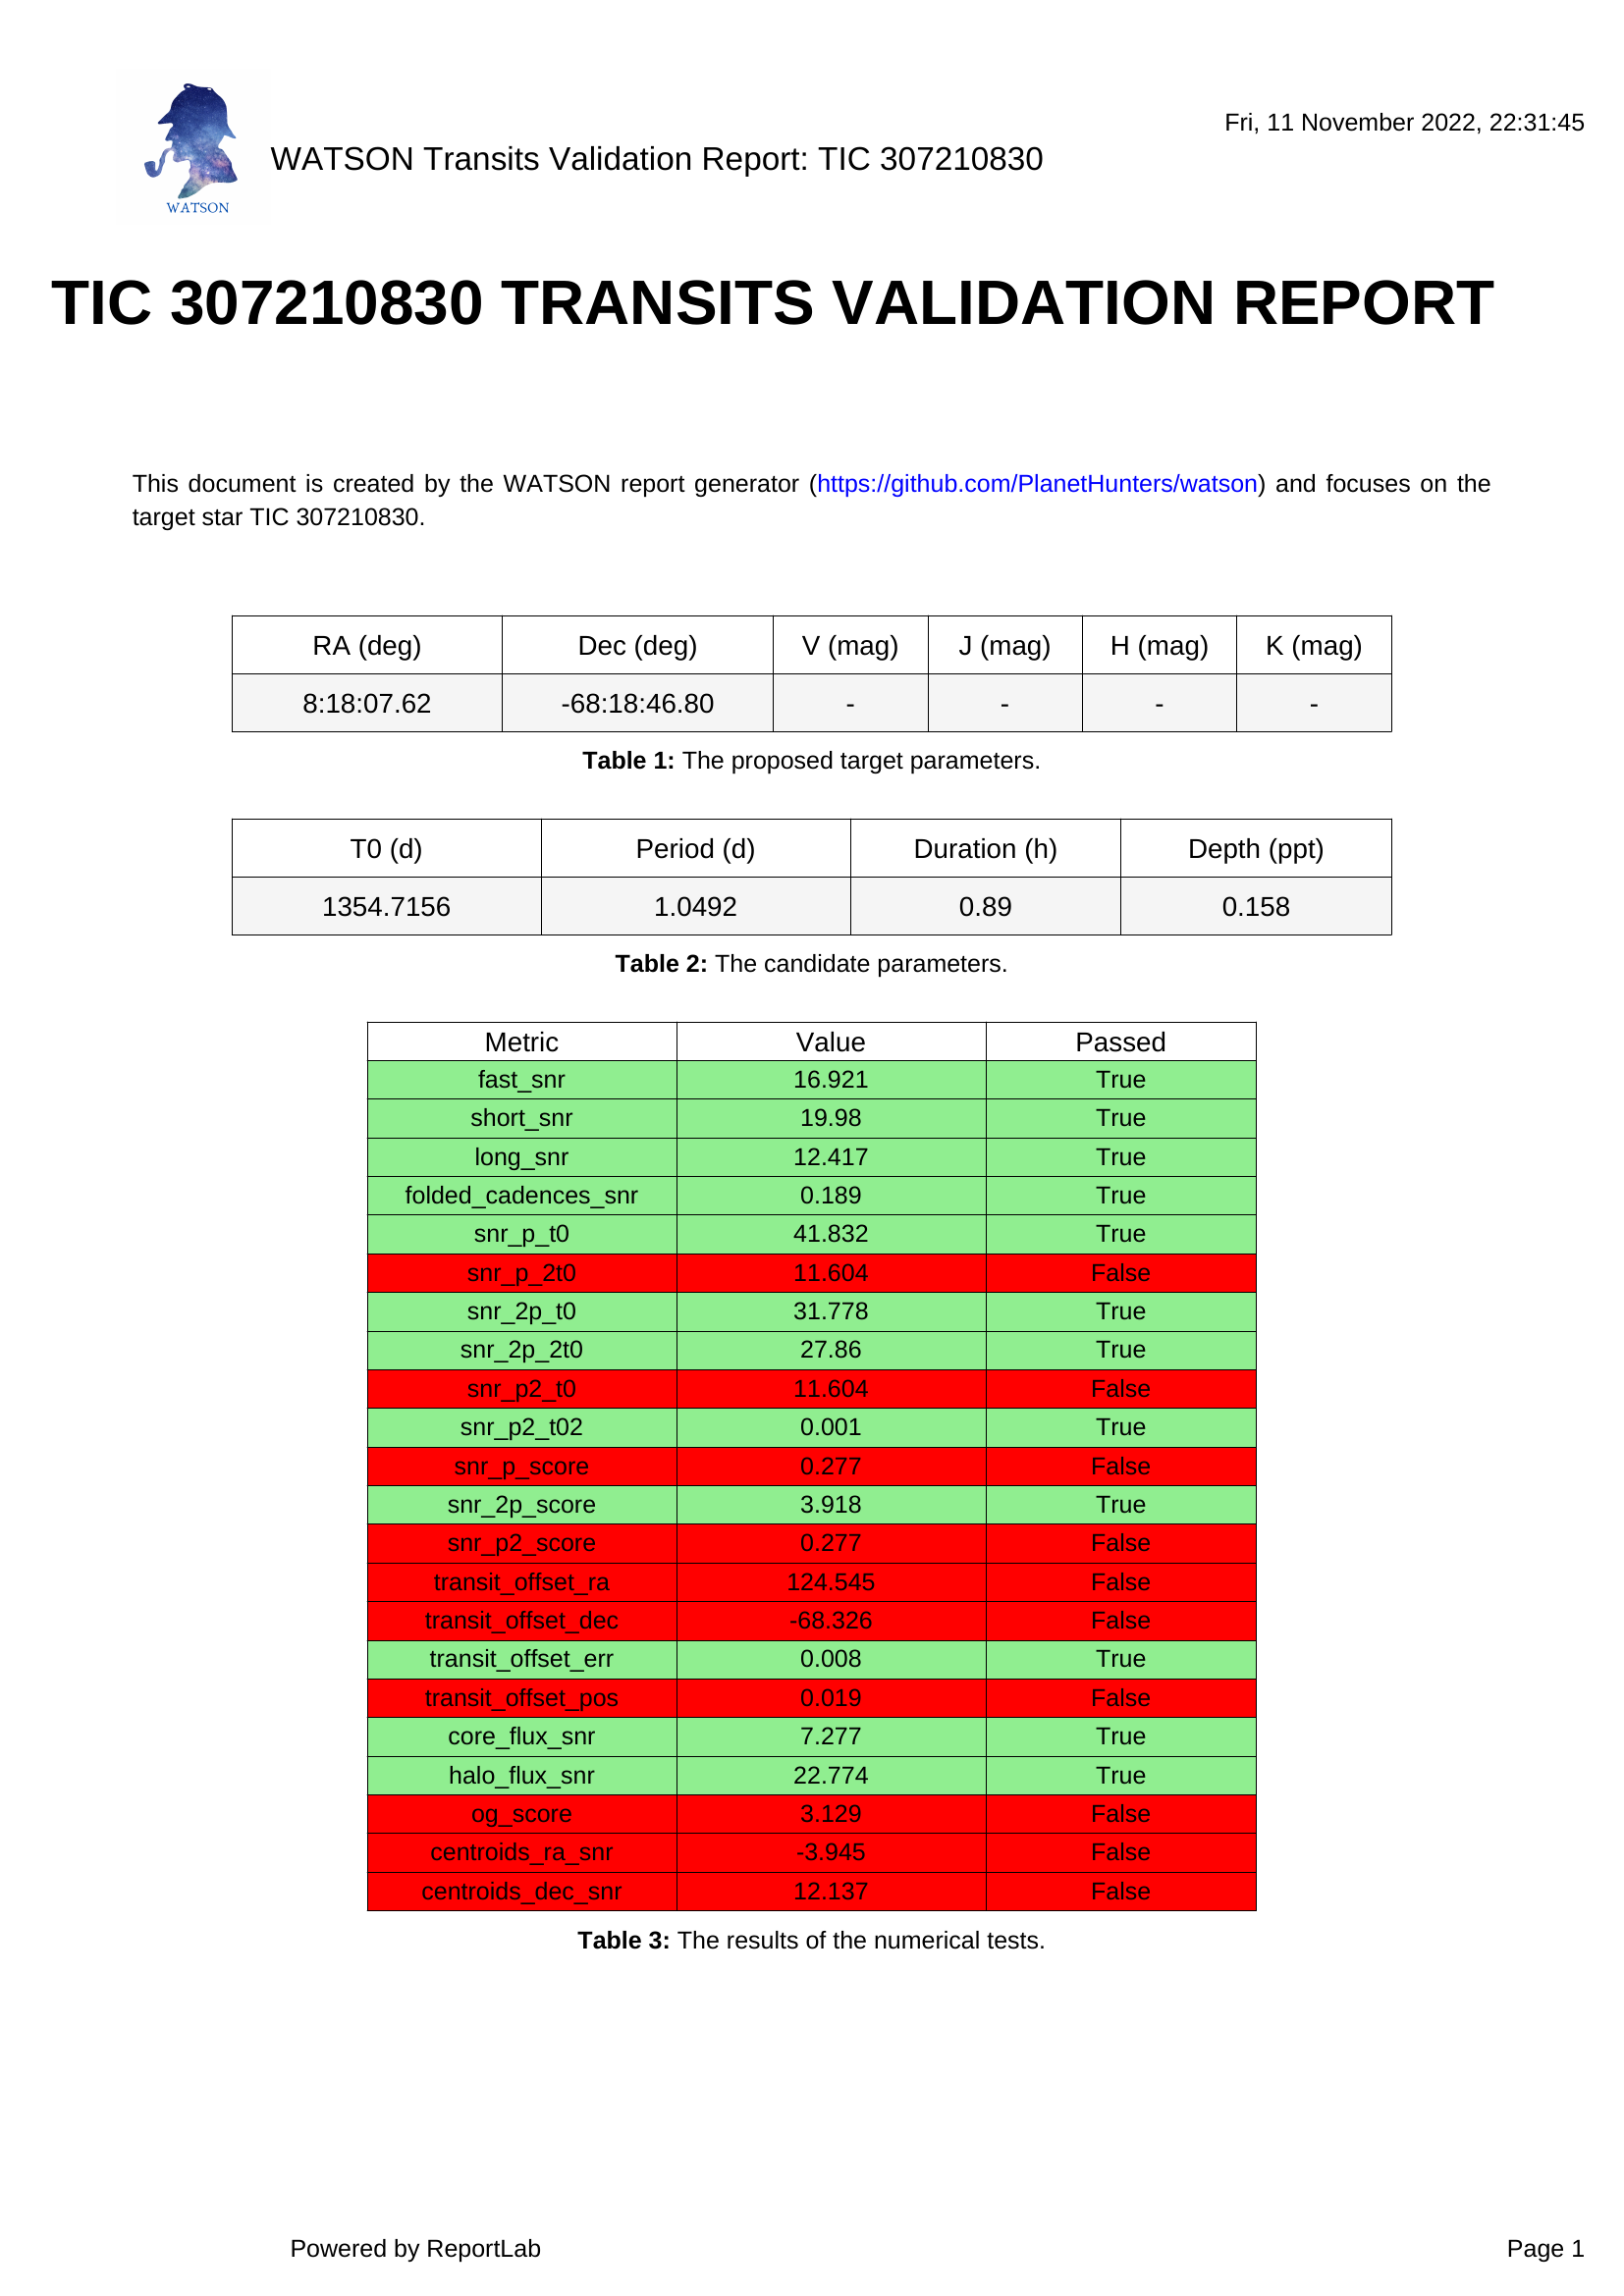

In [6]:
images[0]

It seems that our very promising candidate turnes out to be showing problematic metrics! `snr_p_2t0` (occultations), `snr_p2_t0` (same metric for occultations) and hence `snr_p_score` and `snr_p2_score` also are red. In addition, `transit_offset_ra` and `transit_offset_dec` are red, which leads to `transit_offset_pos` being also rejected. Finally, we can also see that the `og_score` and the `centroids_ra_snr` and `centroids_dec_snr` are also rejected. This might seem as if there was some occultation effect and some transit source located outside of our target would be causing it. But for that, we need to get a closer look to the next pages.

Page 2 contains the Figure 1, which shows the folded curves for the different available cadences (fast, short and long). These metrics were passed so we will just show the page without further insight:

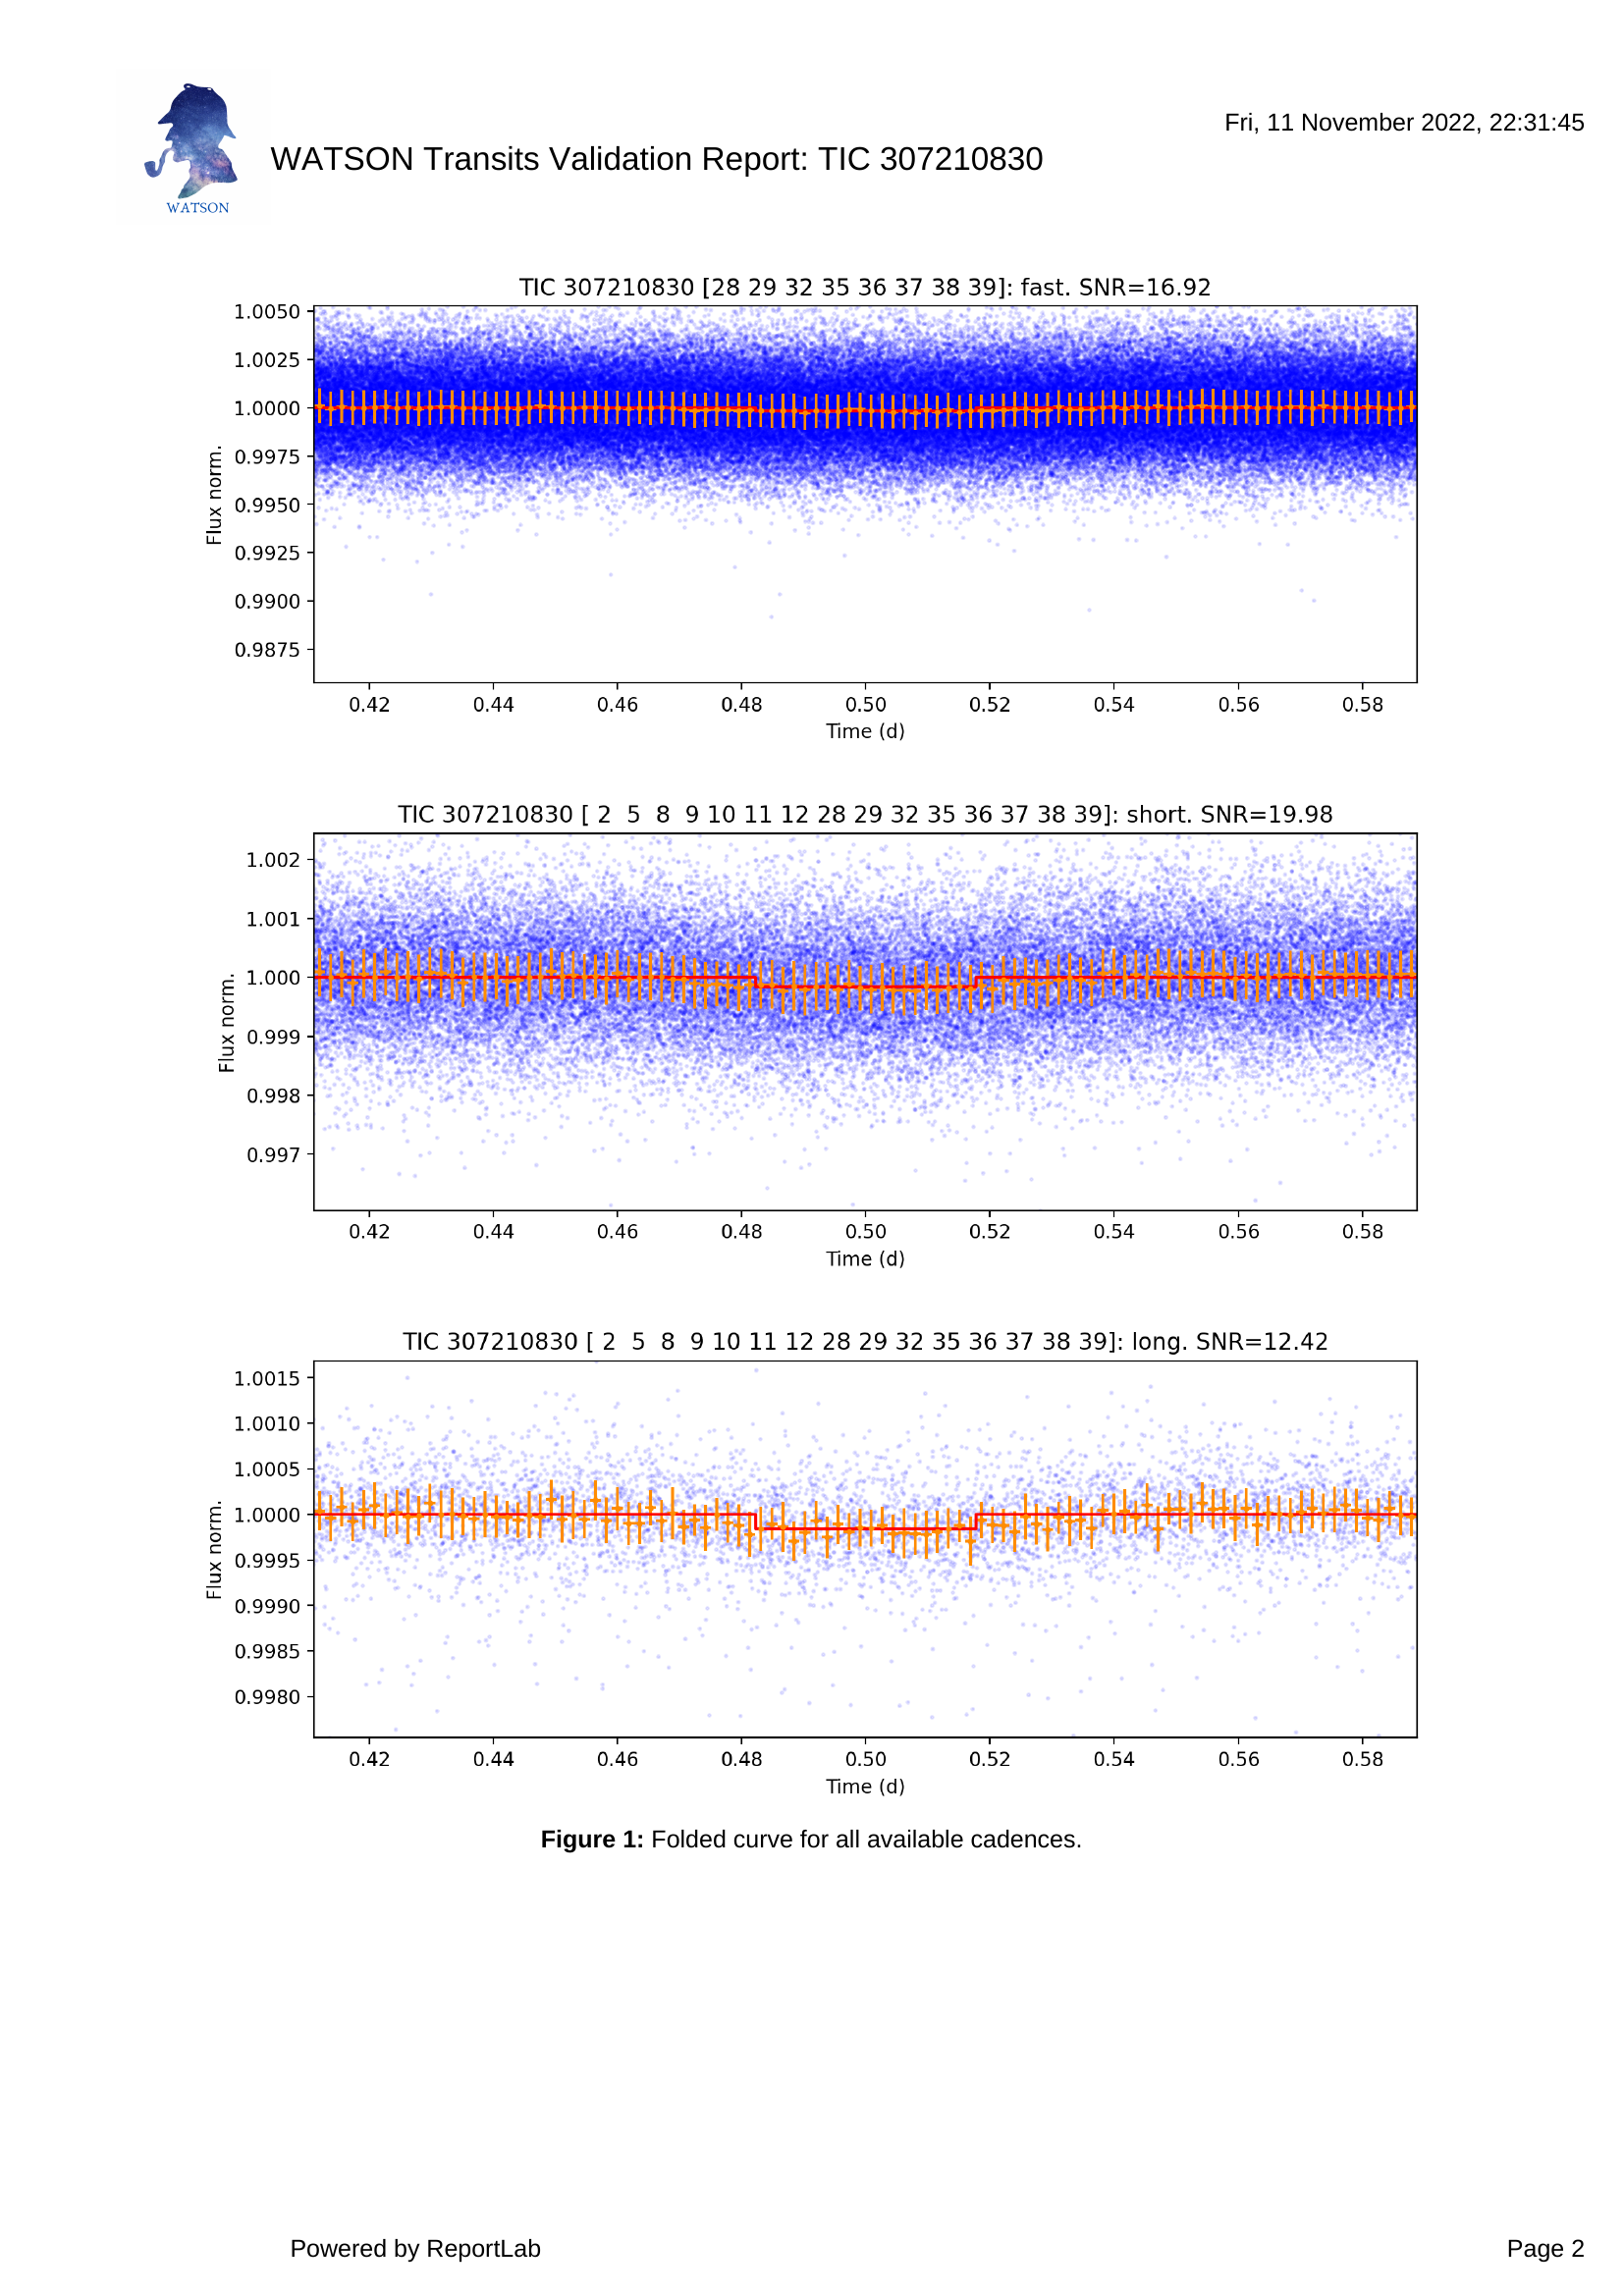

In [7]:
images[1]

Page 3 contains the Figure 2, showing each of the single transits depths reported by the best TLS result. The Figure 3 shows the plots related (from top-left to bottom-right) to the `snr_p_t0`, `snr_p_2t0`, `snr_2p_t0`, `snr_2p_2t0`, `snr_p2_t0`, `snr_p2_t02` metrics, that showed to be problematic. You can see the SNRs reported in each plot title.

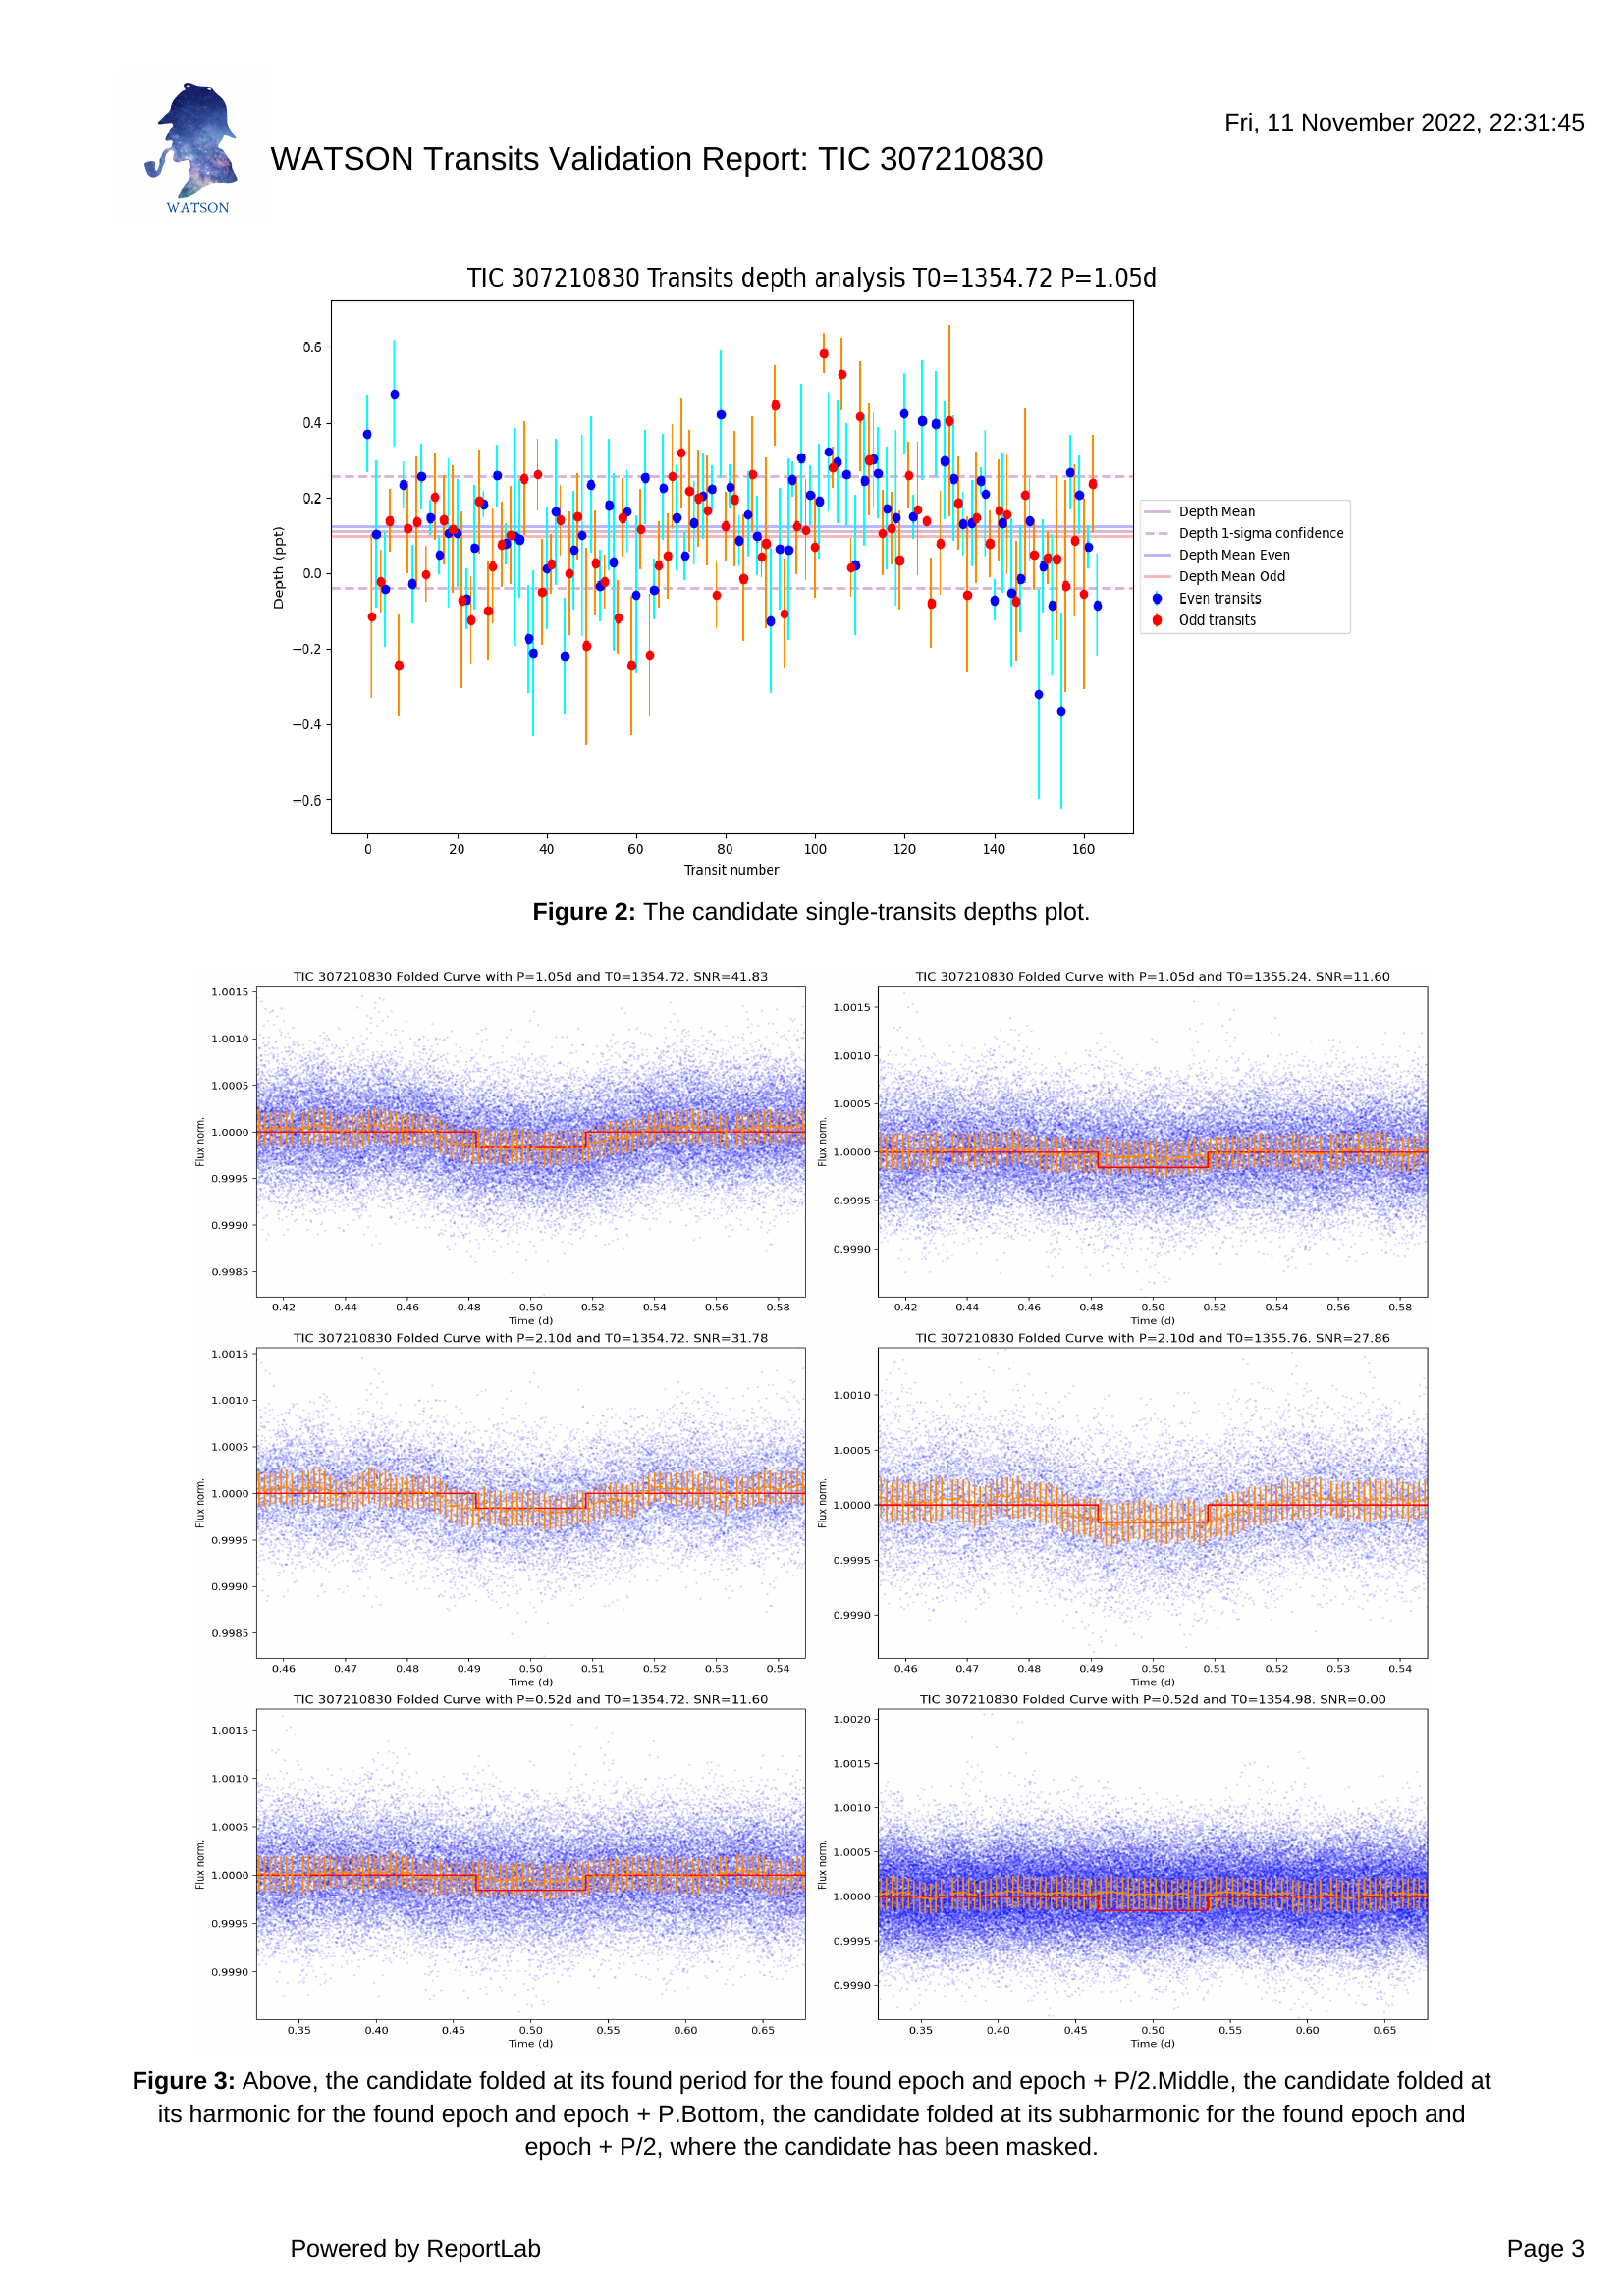

In [8]:
images[2]

Page 4 will show the Figure 4, which plots the transit source position together to the target position and the centroids and optical ghost (core and halo flux) folded curves at the bottom. The transit source position seems to be approximately two pixels far from the target and its uncertainty seems to constrain it still outside the target. That would mean that the transit is probably originated from a nearby star. But wait because that is not the only evidente. Looking into the centroids shift plot we can see both a drift in the RA and DEC with a transit shape, being much deeper in the Dec curve. Finally, the core flux transit shape is much shallower than the halo flux one, which also points to confirm the hypothesis: the transit might be caused by nearby sources.

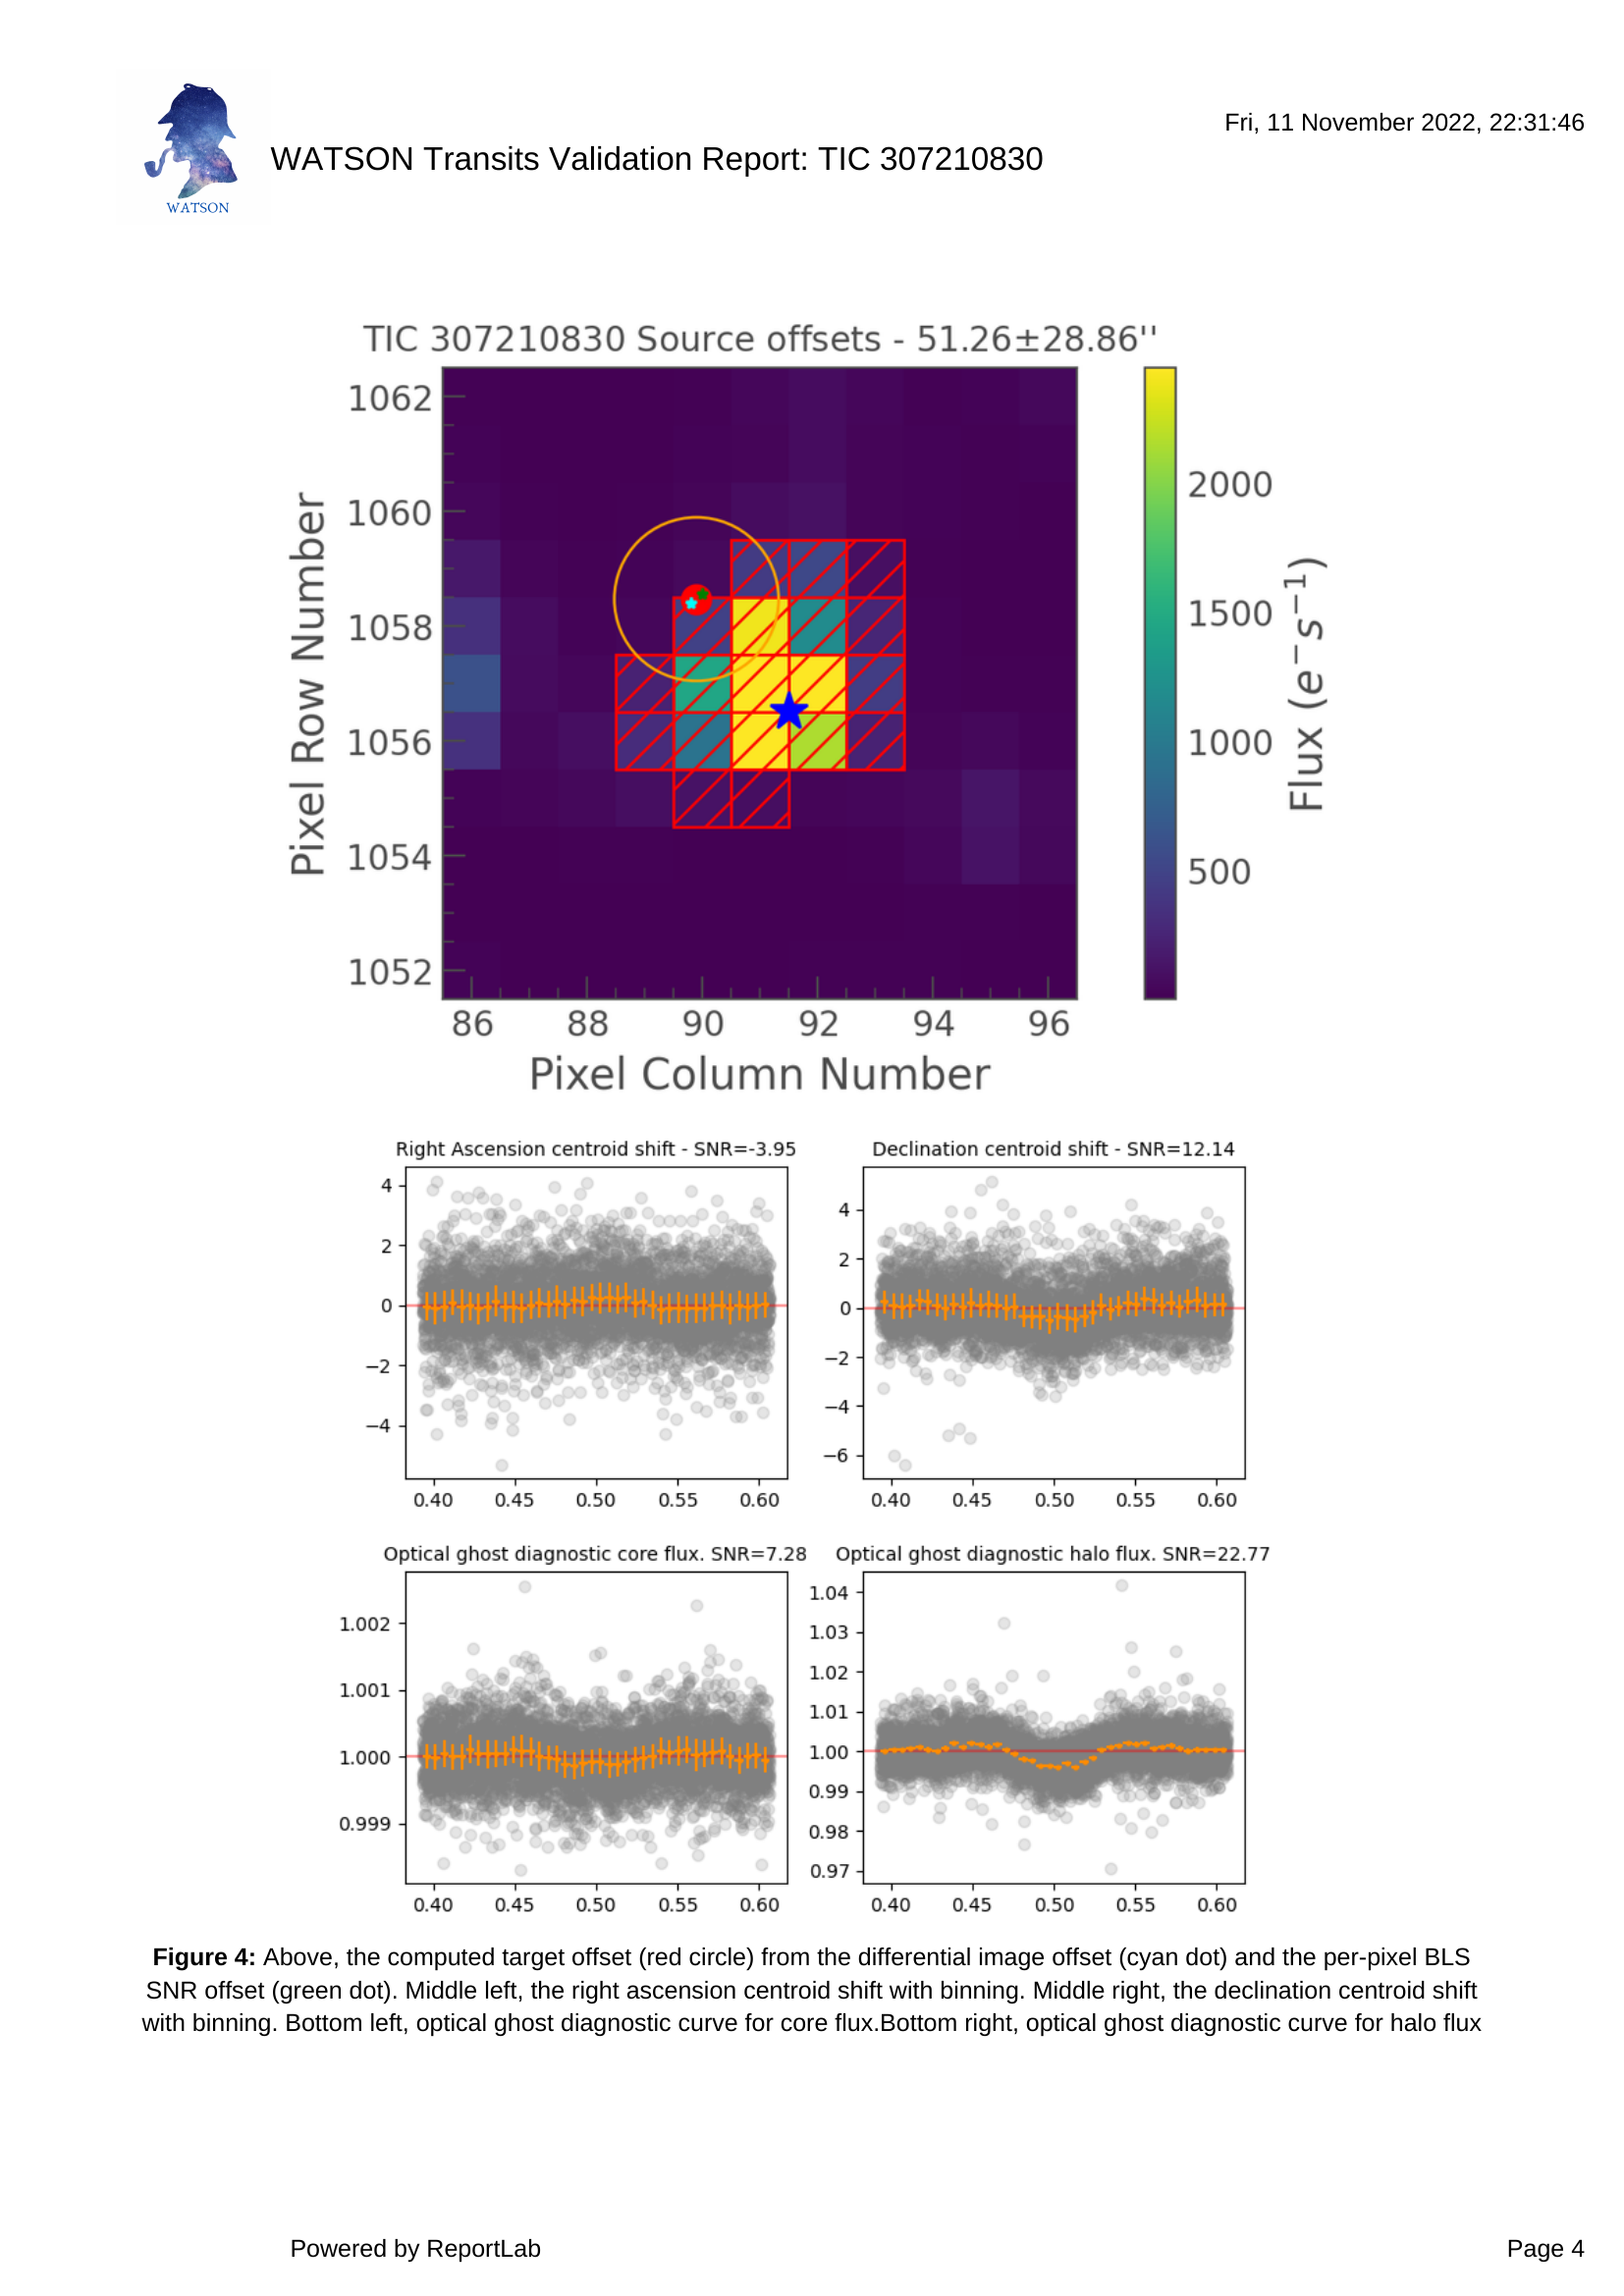

In [9]:
images[3]

The next pages from page 5 to 12 will plot each of the Target Pixel Files pixels folded curves with the signal period and T0. We will only plot the folded TPF for the sector 28. You will observe that the BLS fits for each pixel show clearly that there is a deep transit signal exactly at the same spot where the Figure 4 was pointing the transit source. Both the Per-Pixel BLS SNR map and Differential image SNR map point to the same place, showing a good agreement between both methods.

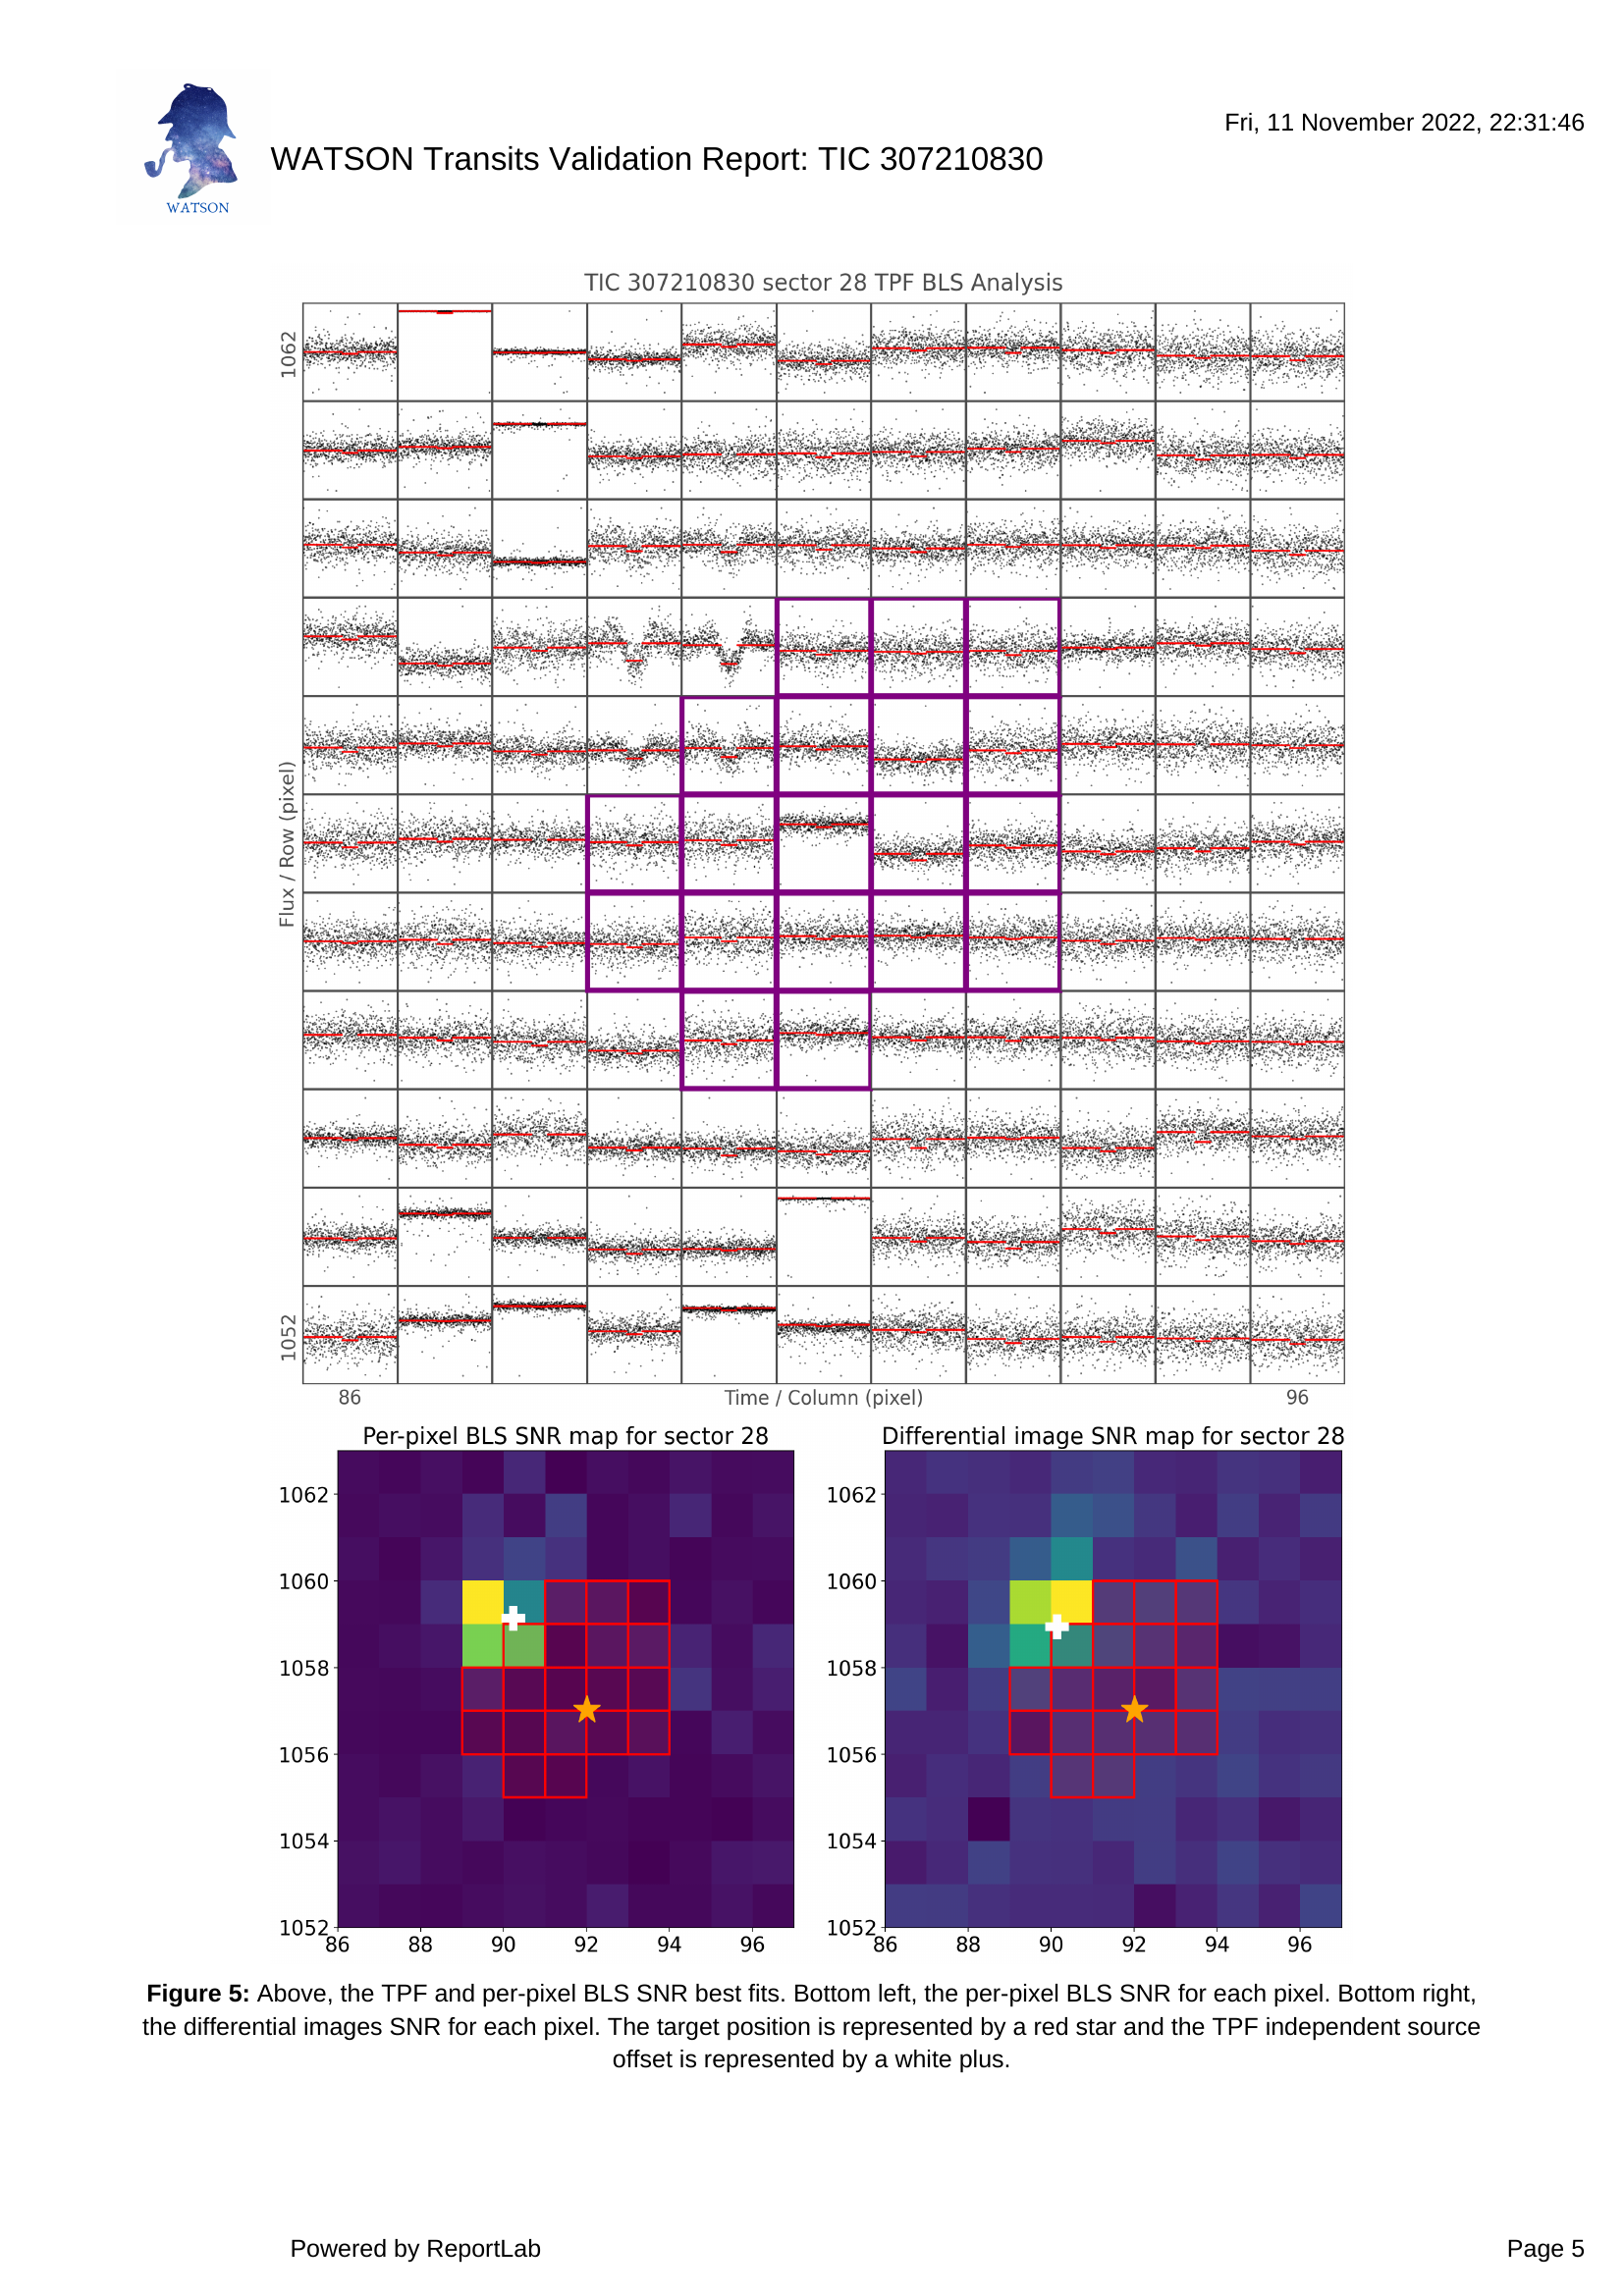

In [10]:
images[4]

If you wanted, you could also inspect each of the single-transits to see if they fell into data gaps or might have been caused by momentum dumps or background flux fluctuations. In this case, we have enough evidence for this candidate to be rejected and claim that it is caused by a Nearby Eclipsing Binary (NEB).